  # The Mini-Project on COVID19 Data Analysis using Python

## Section 1: COVID19 dataset & Libraries

##### All necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium

###### Datasets for Task 1-2

In [3]:
covid_data = pd.read_csv('covid_19_confirmed_dataset.csv')
covid_data_2 = pd.read_csv('covid_19_confirmed_dataset.csv')

## Task 1: Visualize the data for India, China & US countries

In [4]:
covid_data.drop(['Lat', 'Long'], axis=1, inplace=True)

In [5]:
covid_data_agg = covid_data.groupby('Country/Region').sum()

#### data for India, China & US countries

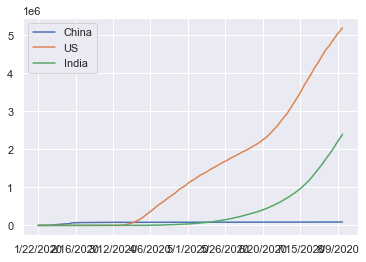

In [6]:
sns.set();
#plt.style.use('classic')
covid_data_agg.loc['China'].plot()
covid_data_agg.loc['US'].plot()
covid_data_agg.loc['India'].plot()
plt.legend();

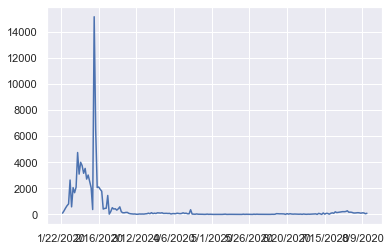

In [7]:
covid_data_agg.loc['China'].diff().plot();

In [8]:
# Calculate the maximum and minimum increase in the cases
max_inc = covid_data_agg.loc['India'].diff().max()
max_inc

66999.0

In [9]:
max_inc = covid_data_agg.loc['US'].diff().max()
max_inc

77255.0

In [10]:
# Check unique countries 
countries = list(covid_data['Country/Region'].unique())
max_infections = []
for c in countries: 
    max_infections.append(covid_data_agg.loc[c].diff().max())

# Add to the data
covid_data_agg['max_infection_rate'] = max_infections

In [11]:
covid_data_agg

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020,8/11/2020,8/12/2020,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,12770,13065,13398,13722,13928,14208,14510,14875,15184,501.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1760,1763,1768,1796,1797,1804,1832,1831,1841,116.0


In [12]:
# Create a new dataframe 
df = pd.DataFrame(covid_data_agg['max_infection_rate'])
df.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0


##### Section 3: World happiness report dataset

In [13]:
# Load Happiness Report Data
happiness_data = pd.read_csv('worldwide_happiness_report.csv')
happiness_data.shape

(156, 9)

In [14]:
useless_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
# Drop the useless cols 
happiness_data.drop(useless_cols, inplace=True, axis=1)
happiness_data

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [15]:
happiness_data.set_index(['Country or region'], inplace=True)

In [16]:
data = df.join(happiness_data,how='inner')
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143
Zambia,915.0,0.578,1.058,0.426,0.431


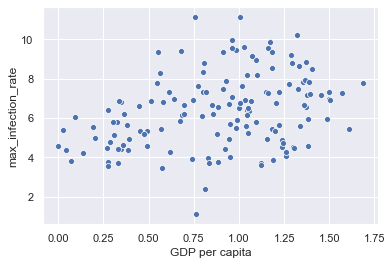

In [17]:
x = data['GDP per capita']
y = data['max_infection_rate']

# Make a scatter plot but due to the scale a logplot should be plotted
sns.scatterplot(x, np.log(y))

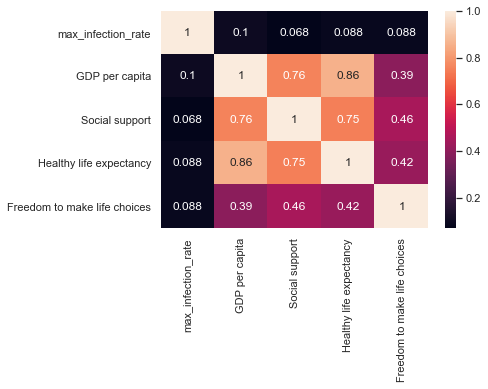

In [18]:
# Plot a correlation matrix and viualise it
sns.heatmap(data.corr(), annot=True)

#### Task 4: Visualization using Folium Map

In [19]:
group_c = covid_data_2.groupby('Country/Region').sum()
df_lo = pd.DataFrame(group_c) 
df_location_co = df_lo[['Lat', 'Long']]

In [20]:
data= df_location_co.join(happiness_data,how='inner')

In [21]:
data

,Lat,Long,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,33.939110,67.709953,0.350,0.517,0.361,0.000
Albania,41.153300,20.168300,0.947,0.848,0.874,0.383
Algeria,28.033900,1.659600,1.002,1.160,0.785,0.086
Argentina,-38.416100,-63.616700,1.092,1.432,0.881,0.471
Armenia,40.069100,45.038200,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,6.423800,-66.589700,0.960,1.427,0.805,0.154
Vietnam,14.058324,108.277199,0.741,1.346,0.851,0.543
Yemen,15.552727,48.516388,0.287,1.163,0.463,0.143
Zambia,-13.133897,27.849332,0.578,1.058,0.426,0.431


#####  Visualize it using Folium  world map

In [22]:
w = folium.Map()

In [23]:
for i in range(0,len(data[data['GDP per capita']>0].index)):
    folium.Circle(
        location=[data.iloc[i]['Lat'],data.iloc[i]['Long']],
        tooltip = "<h5>"+data.iloc[i].name+"</h5>"+
        "<li>Social support:"+str(data.iloc[i]['GDP per capita'])+"</li>"+
        "<li>Recovered:"+str(data.iloc[i]['Social support'])+"</li>"+
        "<li>Healthy life expectancy:"+str(data.iloc[i]['Healthy life expectancy'])+"</li>"+
        "<li>Freedom to make life choices:"+str(data.iloc[i]['Freedom to make life choices'])+"</li>",        
        radius = 100,
        color = '#008000',
        fill_color = '#008000',
        fill=True,
        tiles='cartodbpositron',
        zoom_start=4003400,max_zoom=7,min_zoom=4,height=1000,width='80%'
    
    ).add_to(w)
w